In [1]:
# !pip install flair

In [43]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import download
from flair.models import TextClassifier
from flair.data import Sentence
import numpy as np
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv("Sentiment_analysis_Data.csv")

In [4]:
# download('vader_lexicon')
classifier_flair = TextClassifier.load('sentiment')


In [5]:
df.head()

,text,sentiment_score
0,Hidden fees on loans are just unethical! #Fina...,-0.81
1,Predatory loans are a trap—know the risks befo...,0.34
2,Did you know investing $100 monthly can grow t...,0.11
3,"Surprisingly, budgeting apps can save up to 20...",0.99
4,Imagine achieving financial independence by 40...,-0.14


In [6]:
df.tail()

,text,sentiment_score
1495,"I stick to low-risk investments, ensuring long...",-0.02
1496,"I stick to low-risk investments, ensuring long...",-0.37
1497,I’m working on balancing my budget while savin...,-0.91
1498,I'm taking big financial risks now to secure a...,-0.25
1499,I’m working on balancing my budget while savin...,0.02


In [7]:
df.describe()

,sentiment_score
count,1500.000000
mean,0.008687
std,0.566579
min,-1.000000
25%,-0.460000
50%,-0.030000
75%,0.490000
max,1.000000


In [8]:
df['predicted_sentiment'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['predicted_sentiment_diff'] = df['sentiment_score']-df['predicted_sentiment']

In [9]:
def get_sentiment_analysis_flair(text):
    sentence = Sentence(text)
    classifier_flair.predict(sentence)
    if sentence.labels[0].value == 'NEGATIVE':
        return -1*(sentence.labels[0].score)
    return (sentence.labels[0].score)


In [10]:
df['predicted_sentiment_flair'] = df['text'].apply(lambda x: get_sentiment_analysis_flair(x))
df['predicted_sentiment_flair_diff'] =  df['sentiment_score']-df['predicted_sentiment_flair']

In [11]:
# df['predicted_sentiment_flair'][0]

In [12]:
sid = SentimentIntensityAnalyzer()

def analyze_sentiment(text):
    """
    Analyze the sentiment of a given text.
    Returns a sentiment score in the range [-1, 1].
    """
    sentiment = sid.polarity_scores(text)
    return sentiment['compound']

In [13]:
df['predicted_sentiment_vader'] = df['text'].apply(lambda x: analyze_sentiment(x))
df['predicted_sentiment_vader_diff'] =  df['sentiment_score']-df['predicted_sentiment_vader']


In [14]:
df.head()

,text,sentiment_score,predicted_sentiment,predicted_sentiment_diff,predicted_sentiment_flair,predicted_sentiment_flair_diff,predicted_sentiment_vader,predicted_sentiment_vader_diff
0,Hidden fees on loans are just unethical! #Fina...,-0.81,-0.208333,-0.601667,-0.997392,0.187392,-0.5562,-0.2538
1,Predatory loans are a trap—know the risks befo...,0.34,0.000000,0.340000,-0.995877,1.335877,-0.2732,0.6132
2,Did you know investing $100 monthly can grow t...,0.11,0.000000,0.110000,0.899915,-0.789915,0.0000,0.1100
3,"Surprisingly, budgeting apps can save up to 20...",0.99,0.700000,0.290000,0.889525,0.100475,0.6597,0.3303
4,Imagine achieving financial independence by 40...,-0.14,0.000000,-0.140000,0.613456,-0.753456,0.0000,-0.1400


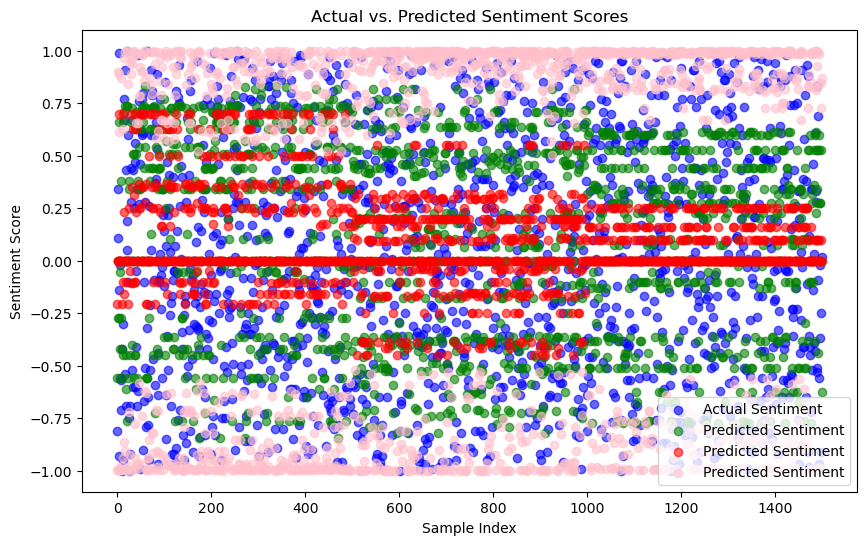

In [15]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(range(len(df)), df['sentiment_score'], color='blue', label='Actual Sentiment', alpha=0.6)
plt.scatter(range(len(df)), df['predicted_sentiment_vader'], color='green', label='Predicted Sentiment', alpha=0.6)
plt.scatter(range(len(df)), df['predicted_sentiment'], color='red', label='Predicted Sentiment', alpha=0.6)
plt.scatter(range(len(df)), df['predicted_sentiment_flair'], color='pink', label='Predicted Sentiment', alpha=0.6)

# Add labels, legend, and title
plt.xlabel('Sample Index')
plt.ylabel('Sentiment Score')
plt.title('Actual vs. Predicted Sentiment Scores')
plt.legend()
plt.show()

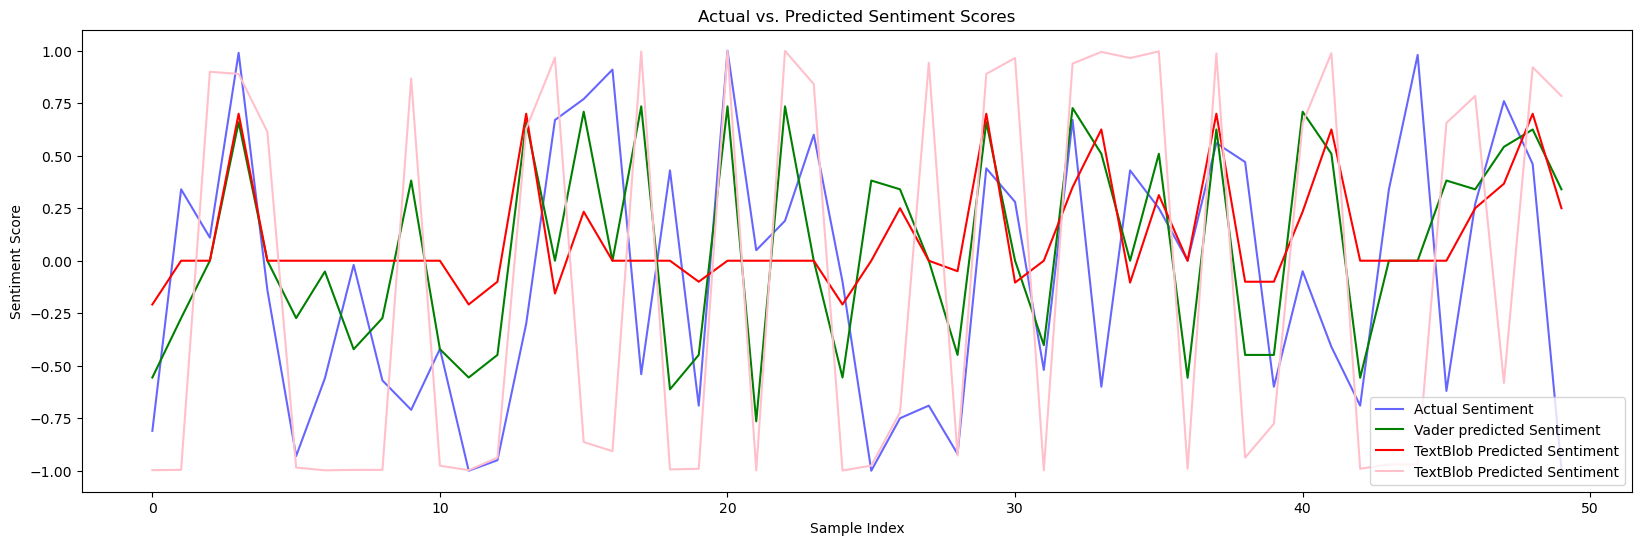

In [16]:
# Scatter plot
plt.figure(figsize=(20, 6))
plt.plot(df.head(50)['sentiment_score'], color='blue', label='Actual Sentiment', alpha=0.6)
plt.plot(df.head(50)['predicted_sentiment_vader'], color='green', label='Vader predicted Sentiment', linewidth=1.5)
plt.plot(df.head(50)['predicted_sentiment'], color='red', label='TextBlob Predicted Sentiment', linewidth=1.5)
plt.plot(df.head(50)['predicted_sentiment_flair'], color='pink', label='TextBlob Predicted Sentiment', linewidth=1.5)

# Add labels, legend, and title
plt.xlabel('Sample Index')
plt.ylabel('Sentiment Score')
plt.title('Actual vs. Predicted Sentiment Scores')
plt.legend()
plt.show()

In [49]:
np.sqrt(mean_squared_error(df['sentiment_score'], df['predicted_sentiment_flair']))

1.0588438361846209

In [51]:
np.sqrt(mean_squared_error(df['sentiment_score'], df['predicted_sentiment_vader']))

0.7118629909610416

In [53]:
# predicted_sentiment
np.sqrt(mean_squared_error(df['sentiment_score'], df['predicted_sentiment']))

0.6057980676097445

In [57]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis")
model = AutoModelForSequenceClassification.from_pretrained("mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis")

In [61]:
from transformers import pipeline

In [67]:
classifier = pipeline('sentiment-analysis')

In [96]:
classifier('I am not happy to learn NLP')

[{'label': 'NEGATIVE', 'score': 0.9995552897453308}]

In [100]:
def get_transformer_sa(text):
    var= classifier(text)
    if var[0]['label']=='NEGATIVE':
        return -1*(var[0]['score'])
    return var[0]['score']

In [102]:
df['transformer_pred'] = df['text'].apply(lambda x: get_transformer_sa(x))

In [103]:
df['transformer_pred_diff'] =  df['sentiment_score'] - df['transformer_pred'] 

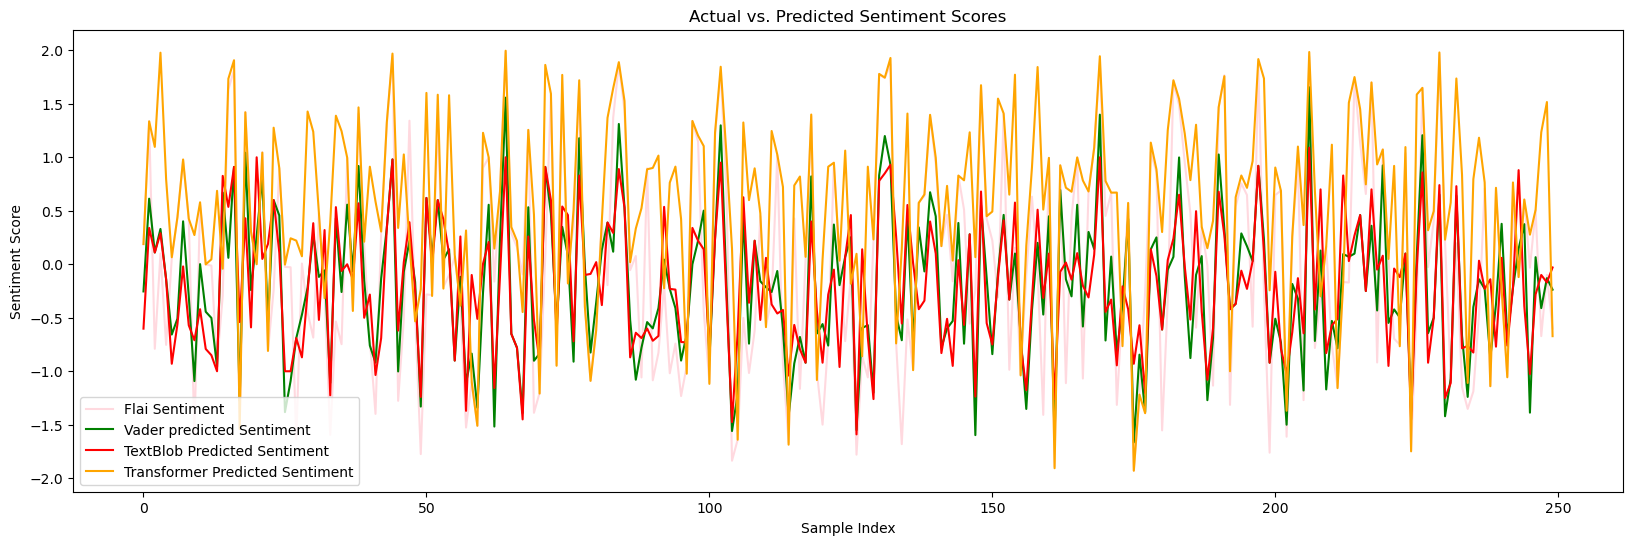

In [104]:
# Scatter plot
plt.figure(figsize=(20, 6))
plt.plot(df.head(250)['predicted_sentiment_flair_diff'], color='pink', label='Flai Sentiment', alpha=0.6)
plt.plot(df.head(250)['predicted_sentiment_vader_diff'], color='green', label='Vader predicted Sentiment', linewidth=1.5)
plt.plot(df.head(250)['predicted_sentiment_diff'], color='red', label='TextBlob Predicted Sentiment', linewidth=1.5)
plt.plot(df.head(250)['transformer_pred_diff'], color='orange', label='Transformer Predicted Sentiment', linewidth=1.5)

# Add labels, legend, and title
plt.xlabel('Sample Index')
plt.ylabel('Sentiment Score')
plt.title('Actual vs. Predicted Sentiment Scores')
plt.legend()
plt.show()

In [110]:
df['transformer_pred'].min()

-0.9997861981391907

In [112]:
np.sqrt(mean_squared_error(df['sentiment_score'],df['transformer_pred']))

1.081391854409314